In [35]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

its an imbalanced dataset

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

It is advised to scale all our values before applying them into a ANN.

In [20]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [21]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

Now we will build our model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/Users/shivangsingh/Desktop/Shivang/Shivang_Codes/CampusX/Deep Learning Series/venvDL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy', 'precision', "recall"])

In [48]:
train_history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8621 - loss: 0.3298 - precision: 0.7548 - recall: 0.4846 - val_accuracy: 0.8525 - val_loss: 0.3460 - val_precision: 0.7444 - val_recall: 0.4136
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8729 - loss: 0.3105 - precision: 0.7872 - recall: 0.5167 - val_accuracy: 0.8556 - val_loss: 0.3430 - val_precision: 0.7337 - val_recall: 0.4506
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8685 - loss: 0.3167 - precision: 0.7581 - recall: 0.5048 - val_accuracy: 0.8512 - val_loss: 0.3469 - val_precision: 0.7622 - val_recall: 0.3858
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8701 - loss: 0.3219 - precision: 0.7876 - recall: 0.4948 - val_accuracy: 0.8556 - val_loss: 0.3430 - val_precision: 0.7337 - val_recall: 0.4506
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8613 - loss: 0.3292 - precision: 0.7560 - recall: 0.5127 - val_accuracy: 0.8569

In [49]:
model.layers[0].get_weights()

[array([[-1.5449877e-01,  1.1338640e-01, -9.1668308e-02,  5.8365538e-04,
         -2.4748763e-01,  4.5411885e-02, -2.3868676e-01, -3.0381370e-01,
         -1.0198280e-01,  4.7685295e-02,  2.2870906e-01],
        [ 5.4243386e-01,  2.8281108e-01, -2.3953865e-01, -4.6612132e-01,
          1.3169154e+00, -8.2368612e-02, -2.1496163e-01,  4.6844545e-01,
          1.0880395e+00, -7.7500498e-01,  2.9677531e-01],
        [-6.3210666e-02, -8.1156725e-03, -5.1100485e-02, -1.5419362e-01,
         -4.5907184e-02, -6.5946245e-01, -2.7352357e-01,  6.2050931e-02,
          1.0251311e-01, -1.5189603e-01,  2.6294911e-01],
        [-4.0964249e-01,  8.0920094e-01, -1.4744072e+00, -4.8892062e-02,
          9.1842785e-02,  5.1602697e-01,  5.6488000e-02,  5.7065684e-01,
         -1.2862720e-01, -3.6554204e-03, -4.2166424e-01],
        [-1.2377716e+00,  1.0034935e+00,  7.1957511e-01, -1.0001391e+00,
          7.7038693e-01, -7.1167874e-01,  2.9527691e-01, -1.2741507e+00,
         -6.4002138e-01, -4.0963906e-0

Now we need to have a threshold to find the optimal decision boundary

In [34]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


In [36]:
y_pred = np.where(y_log>0.5, 1,0)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7925

In [51]:
train_history.history

{'accuracy': [0.8660937547683716,
  0.8684375286102295,
  0.8668749928474426,
  0.8676562309265137,
  0.8660937547683716,
  0.8671875,
  0.8667187690734863,
  0.8660937547683716,
  0.8687499761581421,
  0.8684375286102295,
  0.8684375286102295,
  0.8675000071525574,
  0.8690624833106995,
  0.866406261920929,
  0.8682812452316284,
  0.8665624856948853,
  0.8657812476158142,
  0.8670312762260437,
  0.8675000071525574,
  0.8685937523841858,
  0.8682812452316284,
  0.8687499761581421,
  0.8659374713897705,
  0.8684375286102295,
  0.8650000095367432,
  0.8681250214576721,
  0.8659374713897705,
  0.8682812452316284,
  0.8687499761581421,
  0.8687499761581421,
  0.8671875,
  0.8675000071525574,
  0.8685937523841858,
  0.8689062595367432,
  0.8684375286102295,
  0.8693749904632568,
  0.8687499761581421,
  0.8667187690734863,
  0.866406261920929,
  0.8690624833106995,
  0.8678125143051147,
  0.8684375286102295,
  0.8685937523841858,
  0.8682812452316284,
  0.867968738079071,
  0.869687497615814

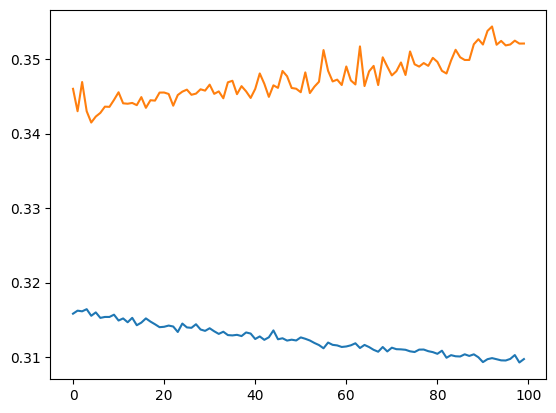

In [53]:
import matplotlib.pyplot as plt

plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])